# Proyecto Sistema de recomendacion de Spotify
## Universidad del Valle de Guatemala
### Curso: Data Science
#### Integrantes del grupo:
1. Javier Mombiela
2. Jose Hernandez
3. Jun Woo
4. Andres de la Roca
5. Pablo Gonzalez
   

### Imports del proyecto

In [48]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

### Load de la data

In [22]:
with open('./data/challenge_set.json', 'r') as file:
    data = json.load(file)

# Crear un DataFrame a partir de la lista de playlists dentro del diccionario
df = pd.DataFrame(data['playlists'])

### Transformaciones

Volver la seccion de playlist en una lista de listas

In [23]:
for index, row in df.iterrows():
    tracks = row['tracks']
    track_list = []
    for track in tracks:
        track_list.append([
            track['pos'],
            track['artist_name'],
            track['track_uri'],
            track['artist_uri'],
            track['track_name'],
            track['album_uri'],
            track['duration_ms'],
            track['album_name']
        ])
    df.at[index, 'tracks'] = track_list

### Visualizar estructrura de la data

In [24]:
filas_5000_5003 = df.iloc[5000:5004]
print(filas_5000_5003)

               name  num_holdouts      pid  num_tracks  \
5000         Oldies           111  1000001         136   
5001    Study Music           104  1000009         129   
5002  Music i like.           139  1000029         164   
5003         Disney           147  1000045         172   

                                                 tracks  num_samples  
5000  [[0, Maze, spotify:track:3kpM8OxeMaaAWI9pErdj1...           25  
5001  [[0, Adele, spotify:track:7rPLZ8Krm6CZIbraFUln...           25  
5002  [[0, Twenty One Pilots, spotify:track:3CRDbSIZ...           25  
5003  [[0, Carmen Twillie, spotify:track:0HU5JnVaKNT...           25  


### Descripcion del dataframe

In [25]:
df.dtypes

name            object
num_holdouts     int64
pid              int64
num_tracks       int64
tracks          object
num_samples      int64
dtype: object

In [26]:
df.describe

<bound method NDFrame.describe of                   name  num_holdouts      pid  num_tracks  \
0     spanish playlist            11  1000002          11   
1              Groovin            48  1000003          48   
2               uplift            40  1000004          40   
3                 WUBZ            27  1000006          27   
4                  new            41  1000007          41   
...                ...           ...      ...         ...   
9995     Playlist 2015            20  1006767          21   
9996           Workout            24  1006771          25   
9997             Girlz            16  1006773          17   
9998    let's get lost            35  1006775          36   
9999              Mama            28  1006778          29   

                                                 tracks  num_samples  
0                                                    []            0  
1                                                    []            0  
2                   

### Forma del dataset

In [27]:
df.shape

(10000, 6)

### Analisis de valores faltantes y eliminacion de los mismos

In [36]:
empty_track_indices = []
for idx, row in df.iterrows():
    if len(row['tracks']) == 0:
        empty_track_indices.append(idx)

# Mostrar el número de listas de tracks vacías
num_empty_tracks = len(empty_track_indices)
print(f"Número de listas de tracks vacías: {num_empty_tracks}")

# Eliminar las filas con listas de tracks vacías
df = df.drop(empty_track_indices)

Número de listas de tracks vacías: 1000


### Estadisticas vacias en el dataset

In [39]:
known_ids = set()
unique_tracks = set()
unique_albums = set()
unique_artists = set()
total_tracks = 0
playlist_vacias = 0
for playlist in df["tracks"]:
    for track in playlist:
        total_tracks += 1
        known_ids.add(track[2])
        unique_tracks.add(track[4])
        unique_albums.add(track[6])
        unique_artists.add(track[1])

print("total playlists:", len(df))
print("total tracks:   ", total_tracks)
print("unique tracks:  ", len(unique_tracks))
print("unique albums:  ", len(unique_albums))
print("unique artists: ", len(unique_artists))
print()

total playlists: 9000
total tracks:    281000
unique tracks:   53954
unique albums:   32264
unique artists:  14040



### Diagrama de caja y bigotes para la variable de duration_ms

Mediana (Q2): 0.75
Cuartil 1 (Q1): 0.75
Cuartil 3 (Q3): 1.25


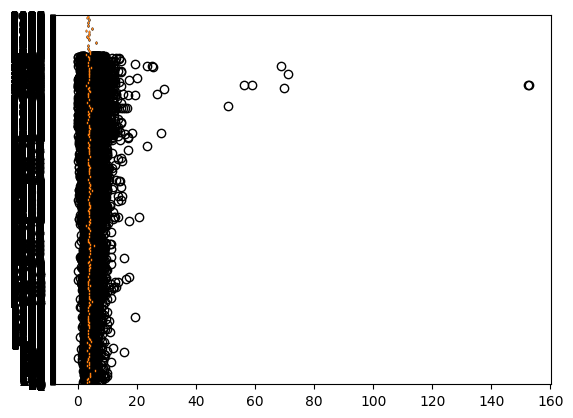

In [65]:

# Extrae la columna de duraciones de canciones en ms y conviértelas a minutos
duracion_minutos = df['tracks'].apply(lambda x: [track[6] / (1000 * 60) for track in x])  # Convierte ms a minutos

# Convierte la columna de duraciones a una lista de valores
duracion_minutos = duracion_minutos.tolist()

# Crea la gráfica de caja y bigotes y guarda los valores calculados
boxplot_values = plt.boxplot(duracion_minutos, vert=False)

# Accede a los valores del boxplot
median = boxplot_values['medians'][0].get_data()[1][0]  # Mediana (Q2)
q1 = boxplot_values['boxes'][0].get_data()[1][0]  # Cuartil 1 (Q1)
q3 = boxplot_values['boxes'][0].get_data()[1][2]  # Cuartil 3 (Q3)
outliers = [flier.get_data()[1] for flier in boxplot_values['fliers']]  # Valores atípicos

# Imprime los valores
print("Mediana (Q2):", median)
print("Cuartil 1 (Q1):", q1)
print("Cuartil 3 (Q3):", q3)


### Diagrama de dispersion

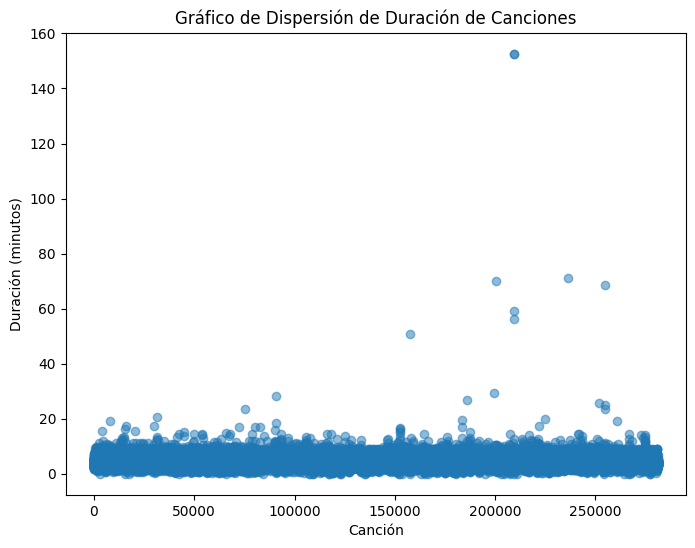

In [67]:

# Extrae la columna de duraciones de canciones en ms y conviértelas a minutos
duracion_minutos = df['tracks'].apply(lambda x: [track[6] / (1000 * 60) for track in x])  # Convierte ms a minutos

# Aplana la lista de listas para obtener una lista unidimensional
duracion_minutos_flat = [item for sublist in duracion_minutos for item in sublist]

# Crea un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(range(len(duracion_minutos_flat)), duracion_minutos_flat, alpha=0.5)
plt.xlabel('Canción')
plt.ylabel('Duración (minutos)')
plt.title('Gráfico de Dispersión de Duración de Canciones')
plt.show()

### Diagrama de caja y bigotes para num_samples

In [ ]:

# Extrae la columna de duraciones de canciones en ms y conviértelas a minutos
num_samples = df['num_samples'] # Convierte ms a minutos

# Convierte la columna de duraciones a una lista de valores
num_samples = num_samples.tolist()

# Crea la gráfica de caja y bigotes y guarda los valores calculados
boxplot_values = plt.boxplot(num_samples, vert=False)

# Accede a los valores del boxplot
median = boxplot_values['medians'][0].get_data()[1][0]  # Mediana (Q2)
q1 = boxplot_values['boxes'][0].get_data()[1][0]  # Cuartil 1 (Q1)
q3 = boxplot_values['boxes'][0].get_data()[1][2]  # Cuartil 3 (Q3)
outliers = [flier.get_data()[1] for flier in boxplot_values['fliers']]  # Valores atípicos

# Imprime los valores
print("Mediana (Q2):", median)
print("Cuartil 1 (Q1):", q1)
print("Cuartil 3 (Q3):", q3)


### Top 10 artistas con mas canciones en el dataset

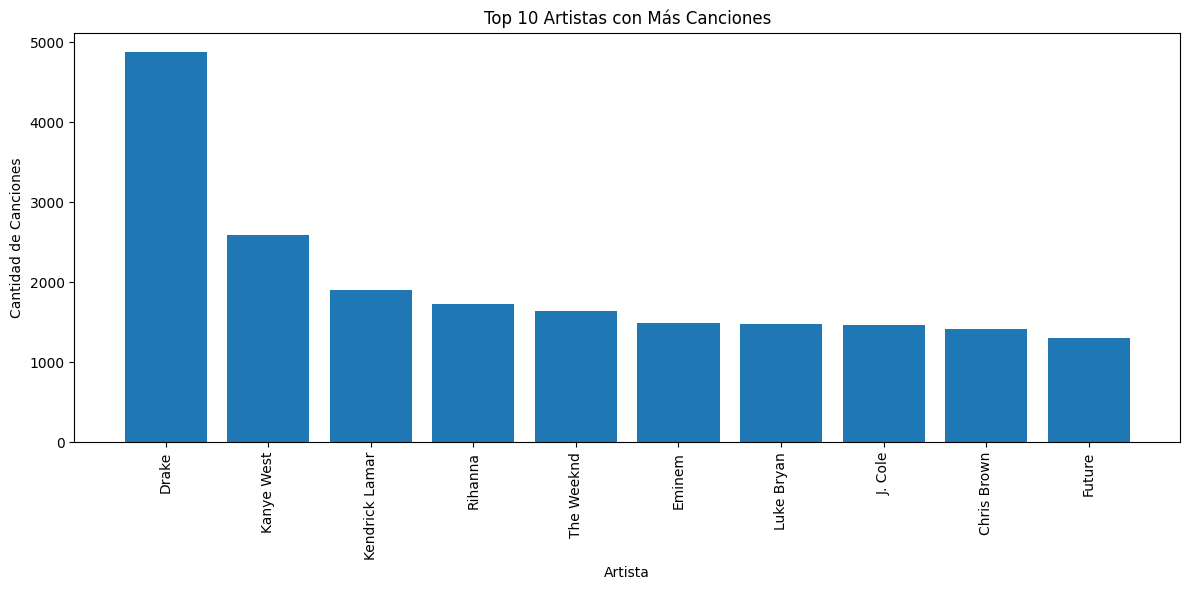

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes tu DataFrame llamado 'df'
# Puedes seleccionar la columna 'tracks' que contiene la información de las canciones
tracks_data = df['tracks']

# Creamos un diccionario para contar la cantidad de canciones por artista
artist_counts = {}

# Iteramos sobre la lista de listas en la columna 'tracks'
for tracks_list in tracks_data:
    for track_info in tracks_list:
        artist_name = track_info[1]  # El nombre del artista está en la posición 1
        if artist_name in artist_counts:
            artist_counts[artist_name] += 1
        else:
            artist_counts[artist_name] = 1

# Convertimos el diccionario en un DataFrame para facilitar la visualización
artist_counts_df = pd.DataFrame(list(artist_counts.items()), columns=['Artista', 'Cantidad de Canciones'])

# Ordenamos el DataFrame por la cantidad de canciones en orden descendente
artist_counts_df = artist_counts_df.sort_values(by='Cantidad de Canciones', ascending=False)

# Seleccionamos los 10 artistas principales
top_10_artists = artist_counts_df.head(10)

# Ahora, puedes crear la gráfica de barras solo para los 10 artistas principales
plt.figure(figsize=(12, 6))
plt.bar(top_10_artists['Artista'], top_10_artists['Cantidad de Canciones'])
plt.xlabel('Artista')
plt.ylabel('Cantidad de Canciones')
plt.title('Top 10 Artistas con Más Canciones')
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje x para una mejor visualización

plt.tight_layout()
plt.show()


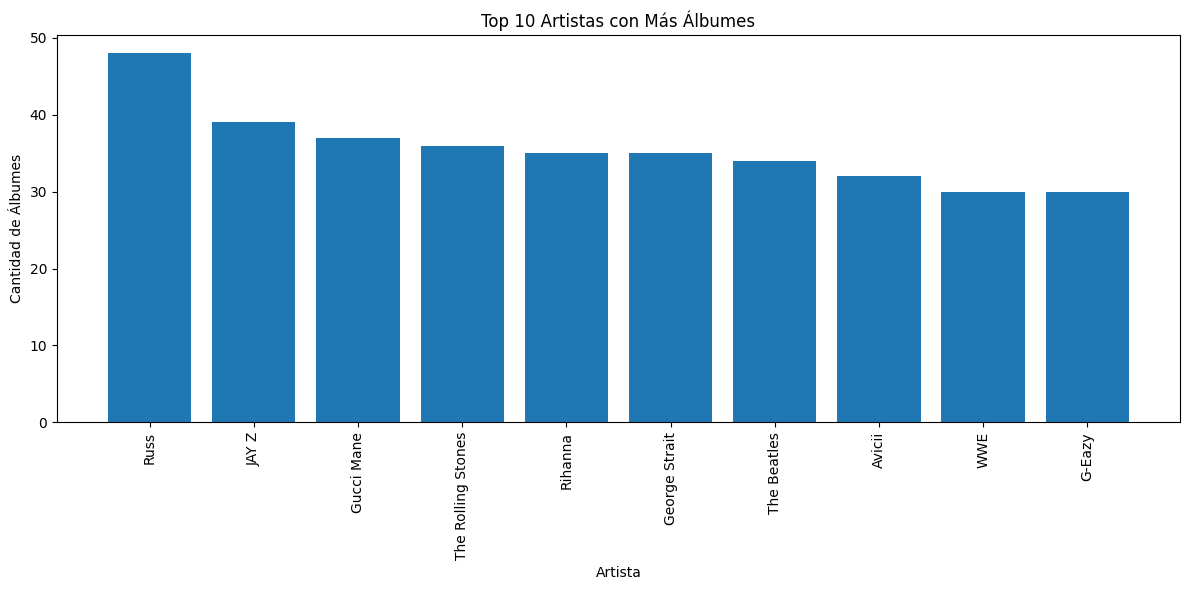

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes tu DataFrame llamado 'df'
# Puedes seleccionar la columna 'tracks' que contiene la información de las canciones
tracks_data = df['tracks']

# Creamos un diccionario para contar la cantidad de álbumes por artista
artist_album_counts = {}

# Iteramos sobre la lista de listas en la columna 'tracks'
for tracks_list in tracks_data:
    for track_info in tracks_list:
        artist_name = track_info[1]  # El nombre del artista está en la posición 1
        album_name = track_info[5]   # El nombre del álbum está en la posición 5
        if artist_name in artist_album_counts:
            artist_album_counts[artist_name].add(album_name)
        else:
            artist_album_counts[artist_name] = {album_name}

# Convertimos el diccionario en un DataFrame para facilitar la visualización
artist_album_counts_df = pd.DataFrame({
    'Artista': list(artist_album_counts.keys()),
    'Cantidad de Álbumes': [len(albums) for albums in artist_album_counts.values()]
})

# Ordenamos el DataFrame por la cantidad de álbumes en orden descendente
artist_album_counts_df = artist_album_counts_df.sort_values(by='Cantidad de Álbumes', ascending=False)

# Seleccionamos los 10 artistas con más álbumes
top_10_artists_albums = artist_album_counts_df.head(10)

# Ahora, puedes crear la gráfica de barras para los 10 artistas con más álbumes
plt.figure(figsize=(12, 6))
plt.bar(top_10_artists_albums['Artista'], top_10_artists_albums['Cantidad de Álbumes'])
plt.xlabel('Artista')
plt.ylabel('Cantidad de Álbumes')
plt.title('Top 10 Artistas con Más Álbumes')
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje x para una mejor visualización

plt.tight_layout()
plt.show()


### Top 10 canciones que mas se repita en el dataset

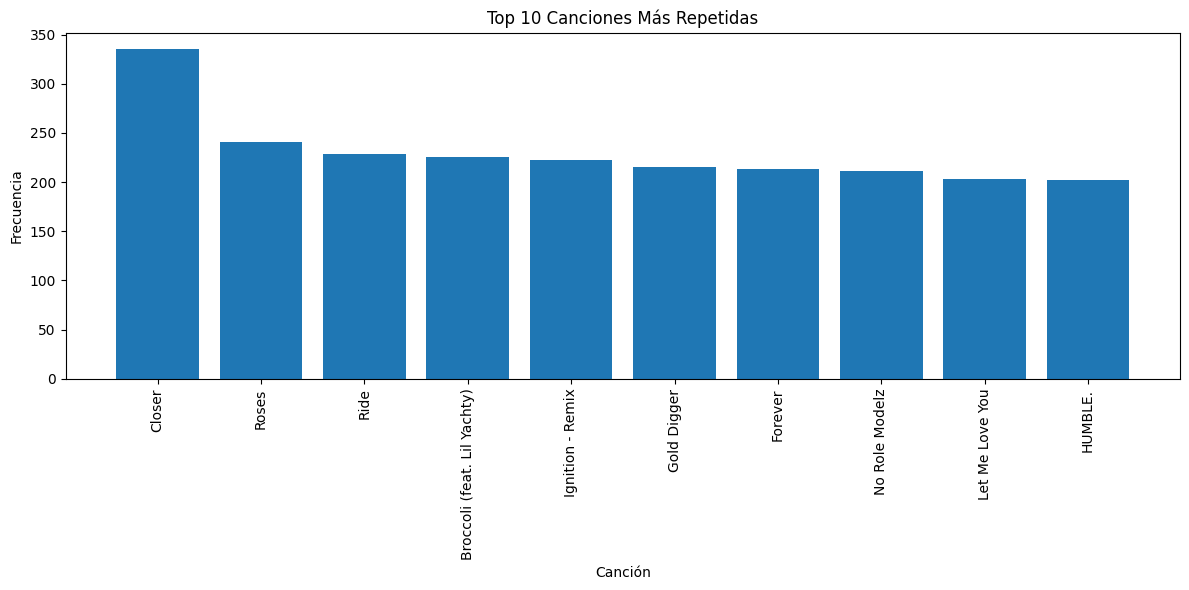

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes tu DataFrame llamado 'df'
# Puedes seleccionar la columna 'tracks' que contiene la información de las canciones
tracks_data = df['tracks']

# Crear un diccionario para contar la frecuencia de cada canción
song_counts = {}

# Iterar sobre la lista de listas en la columna 'tracks'
for tracks_list in tracks_data:
    for track_info in tracks_list:
        song_name = track_info[4]  # El nombre del álbum está en la posición 4
        if song_name in song_counts:
            song_counts[song_name] += 1
        else:
            song_counts[song_name] = 1

# Convertir el diccionario en un DataFrame para facilitar la visualización
song_counts_df = pd.DataFrame(list(song_counts.items()), columns=['Canción', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia en orden descendente
song_counts_df = song_counts_df.sort_values(by='Frecuencia', ascending=False)

# Seleccionar las 10 canciones más repetidas
top_10_songs = song_counts_df.head(10)

# Crear la gráfica de barras para las 10 canciones más repetidas
plt.figure(figsize=(12, 6))
plt.bar(top_10_songs['Canción'], top_10_songs['Frecuencia'])
plt.xlabel('Canción')
plt.ylabel('Frecuencia')
plt.title('Top 10 Canciones Más Repetidas')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización

plt.tight_layout()
plt.show()


### Matriz de correlacion


In [55]:
df2 = df.copy()
df2['duracion_cancion_ms'] = df2['tracks'].apply(lambda x: [int(track[6]) for track in x])
df2['duracion_cancion_ms'] = df2['duracion_cancion_ms'].apply(sum).astype(int)

In [56]:
df2

,name,num_holdouts,pid,num_tracks,tracks,num_samples,duracion_cancion_ms
1000,Party,70,1000000,75,"[[0, AronChupa, spotify:track:66U0ASk1VHZsqIkp...",5,972821
1001,school,73,1000016,78,"[[0, Alesso, spotify:track:6WQLkih8nE0JdUCEyLa...",5,1067918
1002,Modern Music,63,1000020,68,"[[0, Banks, spotify:track:4PvD06Pmbm2rHG2JjSlE...",5,1154480
1003,lit 2.0,49,1000023,54,"[[0, Galantis, spotify:track:6fKEplI9iN0JMHsRG...",5,1172149
1004,bbq,71,1000040,76,"[[0, Stick Figure, spotify:track:3ik1fFvzdgmVu...",5,1425579
...,...,...,...,...,...,...,...
9995,Playlist 2015,20,1006767,21,"[[0, El Gran Combo De Puerto Rico, spotify:tra...",1,339573
9996,Workout,24,1006771,25,"[[0, 2Pac, spotify:track:1JClFT74TYSXlzpagbmj0...",1,285026
9997,Girlz,16,1006773,17,"[[0, Ashley DuBose, spotify:track:4InLm5a9Qtkr...",1,279322
9998,let's get lost,35,1006775,36,"[[0, blackbear, spotify:track:4hdog9vyyqG9pcpp...",1,223295


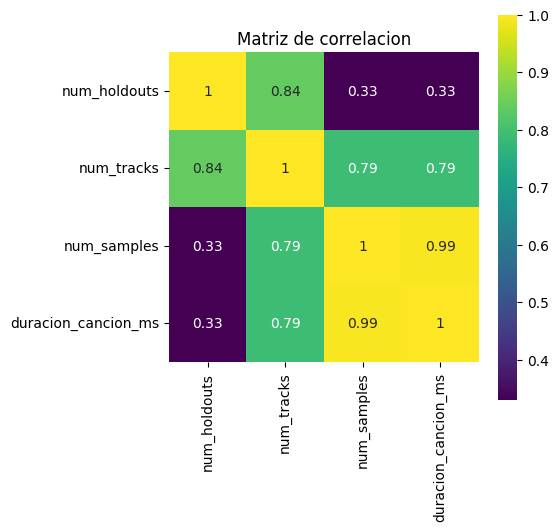

In [57]:

numeric_columns = ['num_holdouts', 'num_tracks', 'num_samples', 'duracion_cancion_ms']

# Calcula la matriz de correlación
correlation_matrix = df2[numeric_columns].corr()
plt.figure(figsize=(5,5))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

